## 3b) Usando la representación (2), genere un código que pueda generar funciones que satisfacen que:
### 1) sean periódicas y pares en $L^2([−1,1])$.
### 2) sean estríctamente crecientes en $L^2([0,1])$.
### 3) sean positivas e integren 1 en $L^2([0,1])$.

$$f(t) := f\left(t, \{\kappa_i\}_{i=0}^\infty\right) = \sum_{i=0}^\infty \kappa_i\varphi_i(t) \qquad\qquad (2)$$

donde $\{\varphi_i\}_{i=0}^\infty$ es una base ortogonal de $L^2(\Omega)$ y $\{\kappa_i\}_{i=0}^\infty$ una secuencia de números reales.

Importamos las librerías/funciones necesarias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

Definimos las funciones de la pregunta 3a)

In [2]:
def simular_seq_S_k(k, alpha, theta):
    return np.array([beta(1-alpha, theta+alpha*i).rvs(1) for i in range(1, k+1)])

def simular_seq_W_k(k, alpha, theta):
    Ss_k = simular_seq_S_k(k, alpha, theta)    
    return np.array([Ss_k[i-1] * np.prod(1-Ss_k[:(i-1)]) for i in range(1,k+1)])

## 3a) 1) Sean periodicas y pares en $L^2([−1,1])$.

In [83]:
cos_k = np.vectorize(lambda t, k: np.cos(np.pi * k * t))

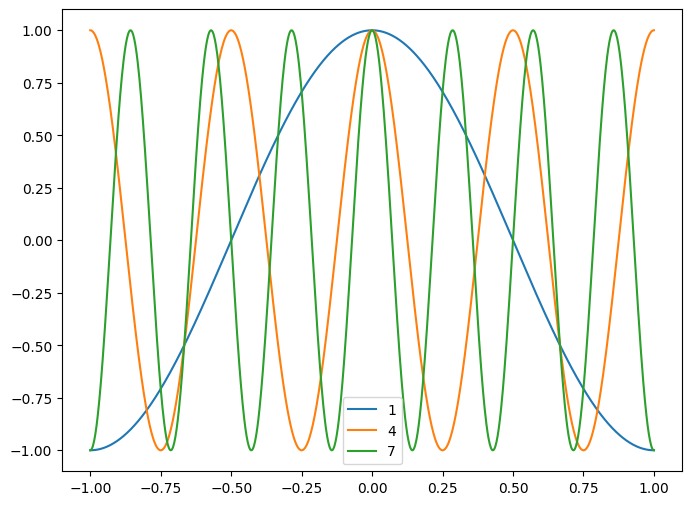

In [84]:
x = np.linspace(-1,1,1_000)
plt.figure(figsize=(8,6))
for k in range(1,10,3):
    plt.plot(x, cos_k(x, k), label=f'{k}')
plt.legend()
plt.show()

In [24]:
k, alpha, theta = 100, 0.5, 10

In [25]:
W_ks = simular_seq_W_k(k, alpha, theta)
f = lambda x, W_ks: sum([W_k * cos_k(x, i) for i in range(k) for W_k in W_ks])

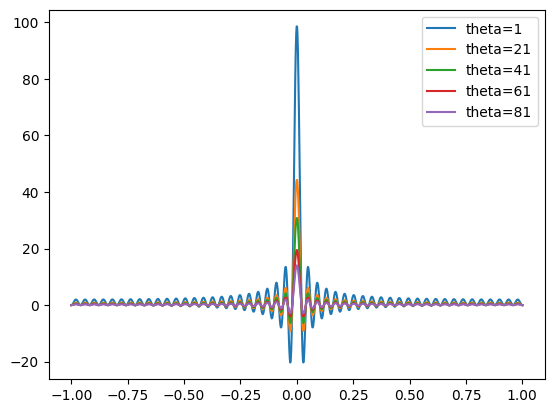

In [54]:
k = 50
alpha = 0.5
thetas = np.arange(1,100,20)
x = np.linspace(-1,1,100)

for theta in thetas:
    W_ks = simular_seq_W_k(k, alpha, theta)
    plt.plot(x, f(x, W_ks), label = f'{theta=}')
plt.legend();

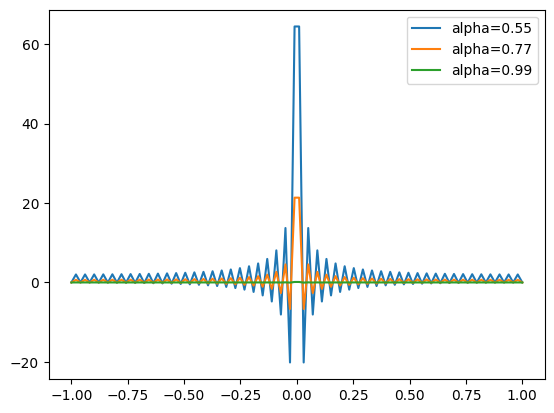

In [51]:
k = 50
alphas = np.linspace(0.55,0.99,3)
theta = 1
x = np.linspace(-1,1,100)

for alpha in alphas:
    W_ks = simular_seq_S_k(k, alpha, theta)
    plt.plot(x, f(x, W_ks), label = f'{alpha=:.2f}')
plt.legend();

## 3a) 2) Sean estríctamente crecientes en $L^2([0,1])$.

In [61]:
from scipy.special import legendre

In [76]:
sin_k = np.vectorize(lambda t, k: np.sin(np.pi / (k+1) * t))

In [77]:
W_ks = simular_seq_W_k(k, alpha, theta)
f_2 = lambda x, pesos: sum([peso_k * sin_k(x, i) for i in range(k) for peso_k in pesos])

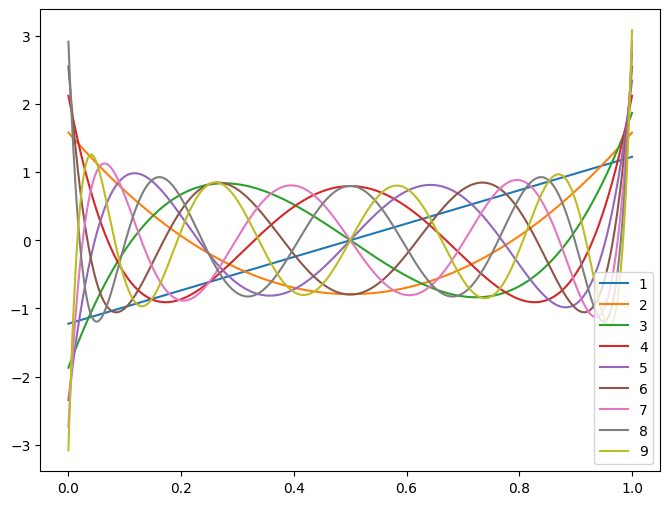

In [85]:
x = np.linspace(0,1,1_000)
plt.figure(figsize=(8,6))

for k in range(1,10):
    plt.plot(x, np.sqrt(k+1/2)*legendre(k)(2*x-1), label=f'{k}')
plt.legend();

In [70]:
f_2 = lambda x, pesos: sum([peso_k * legendre(i)(2*x-1) for i in range(k) for peso_k in pesos])


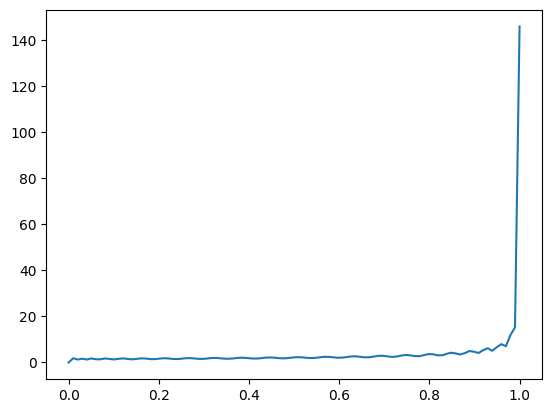

In [71]:
k = 50
alpha = 0.5
theta = 1
x = np.linspace(0,1,100)

W_ks = simular_seq_S_k(k, alpha, theta)

plt.plot(x, f_2(x, W_ks));

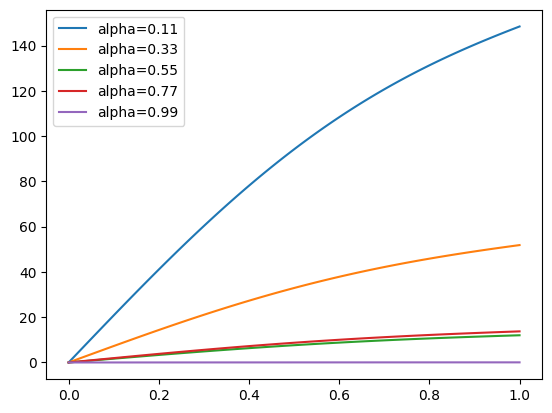

In [82]:
k = 50
alphas = np.linspace(0.11,0.99,5)
theta = 0.01
x = np.linspace(0,1,100)

for alpha in alphas:
    W_ks = simular_seq_S_k(k, alpha, theta)
    plt.plot(x, f_2(x, W_ks), label = f'{alpha=:.2f}')
plt.legend();

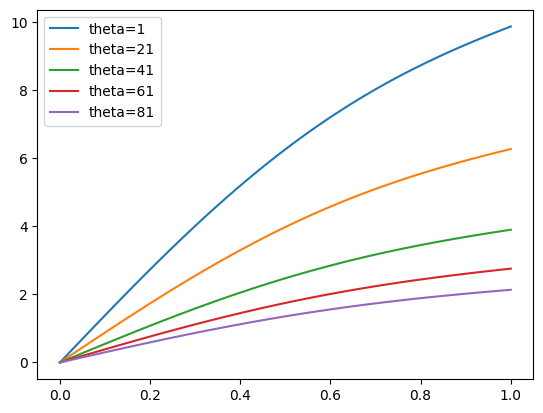

In [78]:
k = 50
alpha = 0.5
thetas = np.arange(1,100,20)
x = np.linspace(0,1,100)

for theta in thetas:
    W_ks = simular_seq_W_k(k, alpha, theta)
    plt.plot(x, f_2(x, W_ks), label = f'{theta=}')
plt.legend();